In [3938]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression,  Lasso, Ridge,ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [3939]:
# Read the 'application_record.csv' file
df = pd.read_csv('https://raw.githubusercontent.com/sriku2412/Creditcard-prediction/main/application_record.csv')

# Read the 'credit_record.csv' file
record = pd.read_csv('https://raw.githubusercontent.com/sriku2412/Creditcard-prediction/main/credit_record.csv')

In [3940]:
df.set_index('ID', inplace=True)

In [3941]:
df['OCCUPATION_TYPE'].fillna('undetermine', inplace=True)# fill NaN with undetermine

In [3942]:
# Find index values of observations above 50000
drop_employ_outliers = df[df['DAYS_EMPLOYED']>50000].index

In [3943]:
df.drop(drop_employ_outliers, inplace=True)

In [3944]:
df[df['CNT_FAM_MEMBERS']>7].count()

CODE_GENDER            26
FLAG_OWN_CAR           26
FLAG_OWN_REALTY        26
CNT_CHILDREN           26
AMT_INCOME_TOTAL       26
NAME_INCOME_TYPE       26
NAME_EDUCATION_TYPE    26
NAME_FAMILY_STATUS     26
NAME_HOUSING_TYPE      26
DAYS_BIRTH             26
DAYS_EMPLOYED          26
FLAG_MOBIL             26
FLAG_WORK_PHONE        26
FLAG_PHONE             26
FLAG_EMAIL             26
OCCUPATION_TYPE        26
CNT_FAM_MEMBERS        26
dtype: int64

In [3945]:
drop_fam_outliers = df[df['CNT_FAM_MEMBERS']>8].index
df.drop(drop_fam_outliers, inplace=True)

<Axes: ylabel='AMT_INCOME_TOTAL'>

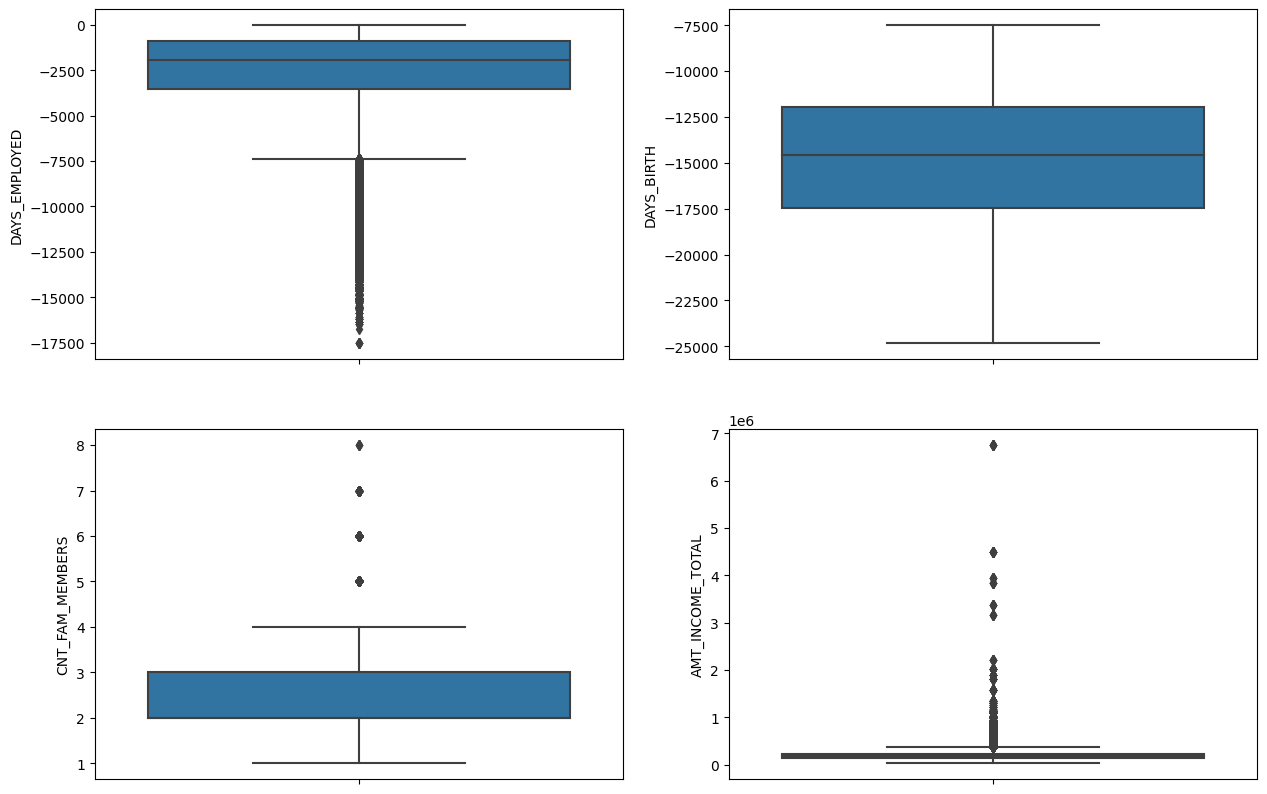

In [3946]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df, y='DAYS_EMPLOYED', ax=ax1)
sns.boxplot(data=df, y='DAYS_BIRTH', ax=ax2)
sns.boxplot(data=df, y='CNT_FAM_MEMBERS', ax=ax3)
sns.boxplot(data=df, y='AMT_INCOME_TOTAL', ax=ax4)

In [3947]:
df[df['AMT_INCOME_TOTAL']>2000000]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5163386,M,Y,N,0,3825000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,1,0,0,1,Managers,2.0
5163387,M,Y,N,0,3825000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,1,0,0,1,Managers,2.0
5163388,M,Y,N,0,3825000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,1,0,0,1,Managers,2.0
5163389,M,Y,N,0,3825000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,1,0,0,1,Managers,2.0
5163390,M,Y,N,0,3825000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-18456,-1095,1,0,0,1,Managers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651834,M,Y,N,0,2025000.0,Working,Higher education,Married,House / apartment,-10887,-1515,1,1,1,0,Managers,2.0
6651835,M,Y,N,0,2025000.0,Working,Higher education,Married,House / apartment,-10887,-1515,1,1,1,0,Managers,2.0
7987964,M,Y,N,0,6750000.0,Working,Higher education,Married,House / apartment,-19341,-443,1,1,1,0,Laborers,2.0


In [3948]:
drop_income_outliers = df[df['AMT_INCOME_TOTAL']>2000000].index
drop_income_outliers

Index([5163386, 5163387, 5163388, 5163389, 5163390, 5584874, 5680511, 5680512,
       5680513, 5680514, 5680516, 5918977, 5873449, 5873450, 5873451, 5873452,
       6071071, 5987963, 5987964, 5987966, 5987967, 5987968, 5987969, 5993384,
       5993385, 5993386, 5993387, 5993388, 5993389, 5993390, 5996392, 5996393,
       5996394, 5996395, 5996396, 5996403, 5996404, 5996405, 5996406, 5996407,
       5996408, 5996409, 5996410, 5996411, 5996412, 5996413, 6318664, 6318665,
       6022090, 6022091, 6022092, 6022093, 6123707, 6123708, 6123709, 6123710,
       6123713, 6123714, 6123715, 6272042, 6272043, 6272044, 6544043, 6544044,
       6544045, 6544046, 6544047, 6651834, 6651835, 7987964, 7873452, 7996394],
      dtype='int64', name='ID')

In [3949]:
df.drop(drop_income_outliers, inplace=True)

In [3950]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,undetermine,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,undetermine,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3951]:
df['GENDER'] = df['CODE_GENDER'].map({'M':1, 'F':0})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y':1, 'N':0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y':1, 'N':0})

In [3952]:
df['AGE'] = ((df['DAYS_BIRTH']/365)/ -1).astype(float).round(2)

In [3953]:
df['YEARS_EMPLOYED'] = ((df['DAYS_EMPLOYED']/365)/ -1).astype(float).round(2)

In [3954]:
df.describe()

/Users/mikeredshaw/Library/Python/3.11/lib/python/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED
count,363119.000000,363119.000000,363119.000000,3.631190e+05,363119.000000,363119.000000,363119.0,363119.000000,363119.000000,363119.000000,363119.000000,363119.000000,363119.000000,363119.000000
mean,0.408326,0.679755,0.506933,1.939666e+05,-14811.752348,-2623.188665,1.0,0.248811,0.286639,0.118807,2.289916,0.364616,40.580150,7.186827
std,0.491525,0.466571,0.760328,1.032001e+05,3501.267259,2399.729717,0.0,0.432325,0.452192,0.323561,0.923785,0.481323,9.592497,6.574597
min,0.000000,0.000000,0.000000,2.700000e+04,-24834.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,20.520000,0.030000
25%,0.000000,0.000000,0.000000,1.350000e+05,-17454.000000,-3512.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,32.700000,2.510000
50%,0.000000,1.000000,0.000000,1.800000e+05,-14580.000000,-1924.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,39.950000,5.270000
75%,1.000000,1.000000,1.000000,2.250000e+05,-11937.000000,-915.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,47.820000,9.620000
max,1.000000,1.000000,6.000000,1.890000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,8.000000,1.000000,68.040000,48.030000


In [3955]:
df['INCOME_PER_MEMBER'] = df['AMT_INCOME_TOTAL']/df['CNT_FAM_MEMBERS']
df['INCOME_PER_CHILD'] = df['AMT_INCOME_TOTAL']/(df['CNT_CHILDREN']+1)

In [3956]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,0,Security staff,2.0,1,58.83,3.11,56250.0,112500.0
5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0


In [3957]:
df.reset_index()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,1,58.83,3.11,56250.0,112500.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363114,6839917,F,0,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,0,0,0,undetermine,2.0,0,30.04,7.41,90000.0,180000.0
363115,6839936,M,1,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,3.0,1,34.44,5.74,45000.0,67500.0
363116,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,Laborers,1.0,0,43.67,8.24,103500.0,103500.0
363117,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,1,0,0,Sales staff,1.0,0,22.38,1.02,54000.0,54000.0


In [3958]:
df.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1, inplace= True)

In [3959]:
print(df['NAME_HOUSING_TYPE'].unique())
print(df['NAME_FAMILY_STATUS'].unique())
print(df['NAME_EDUCATION_TYPE'].unique())
print(df['NAME_INCOME_TYPE'].unique())

['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']


In [3960]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD
ID,,,,,,,,,,,,,,,,,,,,
5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,1,58.83,3.11,56250.0,112500.0
5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0


In [3961]:
record.drop_duplicates(inplace=True)

In [3962]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3963]:
record['HISTORY_LENGTH'] = (record['MONTHS_BALANCE']/-1)+1

In [3964]:
record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [3965]:
record['STATUS_VALUE'] = record['STATUS'].map({'5':0, 'X': 1,'C':2, '0':3, '1':4, '2':5, '3':6, '4':7}).astype(int)

In [3966]:
record['STATUS_RISK'] = record['STATUS'].map({'X':0, 'C': 1,'0':2, '1':3, '2':4, '3':5, '4':6, '5':7}).astype(int)

In [3967]:
record['DID_NOT_USE'] = (record['STATUS'] == 'X').astype(int)
record['PAID_ON_TIME'] = (record['STATUS'] == 'C').astype(int)
record['LATE_PAYMENT'] = (record['STATUS'].isin(['0','1', '2', '3', '4'])).astype(int)
record['EXTREME_LATE_PAYMENT'] = (record['STATUS'].isin([ '3', '4'])).astype(int)
record['DEFAULT'] = (record['STATUS'] == '5').astype(int)

In [3968]:
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,DEFAULT
0,5001711,0,X,1.0,1,0,1,0,0,0,0
1,5001711,-1,0,2.0,3,2,0,0,1,0,0
2,5001711,-2,0,3.0,3,2,0,0,1,0,0
3,5001711,-3,0,4.0,3,2,0,0,1,0,0
4,5001712,0,C,1.0,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,1,0,0,0
1048571,5150487,-26,C,27.0,2,1,0,1,0,0,0
1048572,5150487,-27,C,28.0,2,1,0,1,0,0,0
1048573,5150487,-28,C,29.0,2,1,0,1,0,0,0


In [3969]:
bin_labels = [1, 2, 3, 4, 5]
record['HISTORY_VALUE'] = pd.qcut(record['HISTORY_LENGTH'], 5, labels=bin_labels, duplicates='drop')
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,DEFAULT,HISTORY_VALUE
0,5001711,0,X,1.0,1,0,1,0,0,0,0,1
1,5001711,-1,0,2.0,3,2,0,0,1,0,0,1
2,5001711,-2,0,3.0,3,2,0,0,1,0,0,1
3,5001711,-3,0,4.0,3,2,0,0,1,0,0,1
4,5001712,0,C,1.0,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,1,0,0,0,4
1048571,5150487,-26,C,27.0,2,1,0,1,0,0,0,4
1048572,5150487,-27,C,28.0,2,1,0,1,0,0,0,4
1048573,5150487,-28,C,29.0,2,1,0,1,0,0,0,4


In [3970]:
grouped_mean = record.groupby('ID').agg({
    'STATUS_RISK': 'mean',
    'STATUS_VALUE': 'mean',
    'HISTORY_LENGTH': 'max',
    'DID_NOT_USE': 'sum',
    'PAID_ON_TIME': 'sum',
    'LATE_PAYMENT': 'sum',
    'EXTREME_LATE_PAYMENT': 'sum',
    'DEFAULT': 'sum'
}).reset_index()

In [3971]:
grouped_mean.rename(columns={'DEFAULT': 'NUM_OF_DEFAULTS'}, inplace=True)

In [3972]:
print(grouped_mean)

            ID  STATUS_RISK  STATUS_VALUE  HISTORY_LENGTH  DID_NOT_USE   
0      5001711     1.500000      2.500000             4.0            1  \
1      5001712     1.526316      2.526316            19.0            0   
2      5001713     0.000000      1.000000            22.0           22   
3      5001714     0.000000      1.000000            15.0           15   
4      5001715     0.000000      1.000000            60.0           60   
...        ...          ...           ...             ...          ...   
45980  5150482     1.666667      2.666667            29.0            0   
45981  5150483     0.000000      1.000000            18.0           18   
45982  5150484     1.923077      2.923077            13.0            0   
45983  5150485     2.000000      3.000000             2.0            0   
45984  5150487     1.000000      2.000000            30.0            0   

       PAID_ON_TIME  LATE_PAYMENT  EXTREME_LATE_PAYMENT  NUM_OF_DEFAULTS  
0                 0             3   

In [3973]:
grouped_mean['DNU_RATIO'] = grouped_mean['DID_NOT_USE']/ grouped_mean['HISTORY_LENGTH']
grouped_mean['POT_RATIO'] = grouped_mean['PAID_ON_TIME']/ grouped_mean['HISTORY_LENGTH']
grouped_mean['LP_RATIO'] = grouped_mean['LATE_PAYMENT']/ grouped_mean['HISTORY_LENGTH']
grouped_mean['ELP_RATIO'] = grouped_mean['EXTREME_LATE_PAYMENT']/ grouped_mean['HISTORY_LENGTH']
grouped_mean['D_RATIO'] = grouped_mean['NUM_OF_DEFAULTS']/ grouped_mean['HISTORY_LENGTH']


In [3974]:
grouped_mean['PAYMENT_RISK'] = ((grouped_mean['LP_RATIO']*0.1) + (grouped_mean['ELP_RATIO']*0.2) + (grouped_mean['D_RATIO']*0.7))*100

In [3975]:
grouped_mean['PAYMENT_RISK'] = grouped_mean['PAYMENT_RISK'].round(0)

In [3976]:
grouped_mean['PAYMENT_RISK'].describe()

count    45985.000000
mean         4.109688
std          3.753219
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: PAYMENT_RISK, dtype: float64

In [3977]:
grouped_mean.groupby('PAYMENT_RISK').count()

,ID,STATUS_RISK,STATUS_VALUE,HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,NUM_OF_DEFAULTS,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO
PAYMENT_RISK,,,,,,,,,,,,,,
0.0,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548,7548
1.0,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241,6241
2.0,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
3.0,4484,4484,4484,4484,4484,4484,4484,4484,4484,4484,4484,4484,4484,4484
4.0,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478
5.0,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021
6.0,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336,2336
7.0,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816
8.0,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074


(array([3.3756e+04, 1.2087e+04, 4.6000e+01, 2.6000e+01, 2.5000e+01,
        1.1000e+01, 1.2000e+01, 7.0000e+00, 9.0000e+00, 6.0000e+00]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <BarContainer object of 10 artists>)

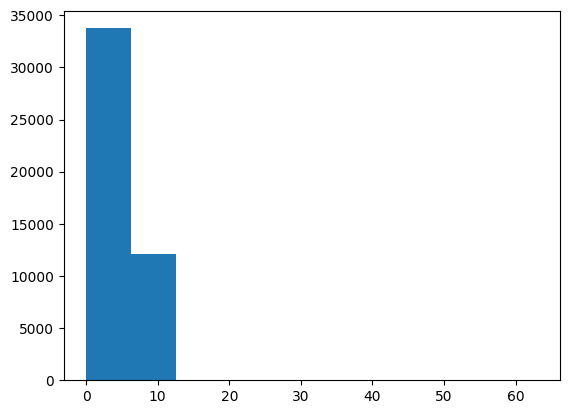

In [3978]:
plt.hist(grouped_mean['PAYMENT_RISK'])

In [3979]:
grouped_mean.groupby('PAYMENT_RISK')['NUM_OF_DEFAULTS'].describe()

,count,mean,std,min,25%,50%,75%,max
PAYMENT_RISK,,,,,,,,
0.0,7548.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1.0,6241.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
2.0,6648.0,0.000301,0.017344,0.0,0.00,0.0,0.00,1.0
3.0,4484.0,0.000892,0.029857,0.0,0.00,0.0,0.00,1.0
4.0,3478.0,0.002300,0.067797,0.0,0.00,0.0,0.00,3.0
5.0,3021.0,0.000993,0.031502,0.0,0.00,0.0,0.00,1.0
6.0,2336.0,0.006421,0.118708,0.0,0.00,0.0,0.00,3.0
7.0,1816.0,0.011564,0.205646,0.0,0.00,0.0,0.00,5.0
8.0,2074.0,0.013018,0.197242,0.0,0.00,0.0,0.00,5.0


In [3980]:
bins = [0, 2, 10, 20, 30, 40, 50, float('inf')]
labels = ['1', '2', '3', '4', '5', '6', '7']
grouped_mean['PAYMENT_RISK_LEVEL'] = pd.cut(grouped_mean['PAYMENT_RISK'], bins=bins, labels=labels, right=False)


/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_19234/3071349349.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=summary_stats.index, y=summary_stats['mean'], ci='sd', palette='viridis')


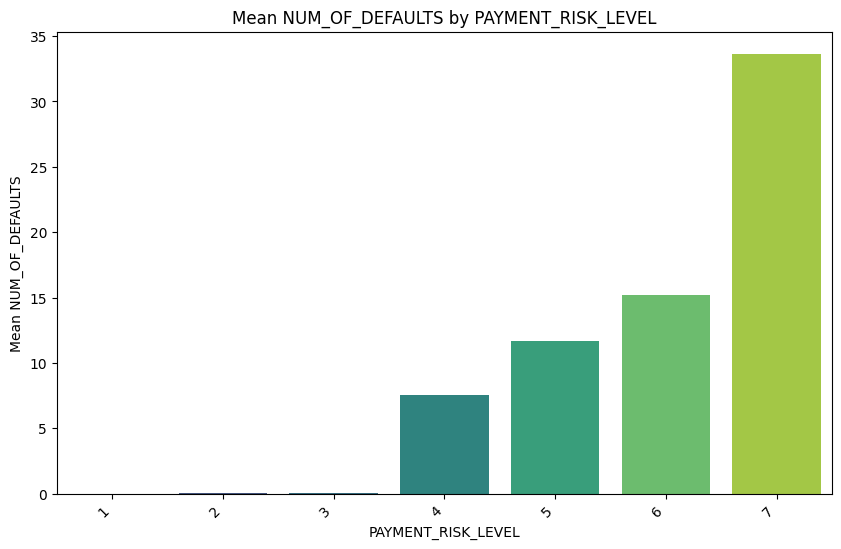

In [3981]:
summary_stats = grouped_mean.groupby('PAYMENT_RISK_LEVEL')['NUM_OF_DEFAULTS'].describe()

plt.figure(figsize=(10, 6))
sns.barplot(x=summary_stats.index, y=summary_stats['mean'], ci='sd', palette='viridis')
plt.xlabel('PAYMENT_RISK_LEVEL')
plt.ylabel('Mean NUM_OF_DEFAULTS')
plt.title('Mean NUM_OF_DEFAULTS by PAYMENT_RISK_LEVEL')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_19234/3026871552.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=summary_stats.index, y=summary_stats['mean'], ci='sd', palette='viridis')


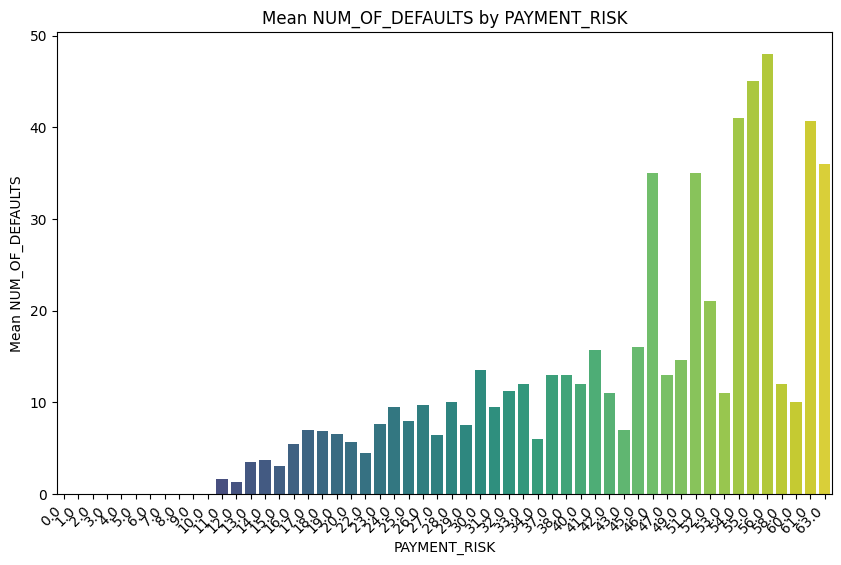

In [3982]:
summary_stats = grouped_mean.groupby('PAYMENT_RISK')['NUM_OF_DEFAULTS'].describe()

plt.figure(figsize=(10, 6))
sns.barplot(x=summary_stats.index, y=summary_stats['mean'], ci='sd', palette='viridis')
plt.xlabel('PAYMENT_RISK')
plt.ylabel('Mean NUM_OF_DEFAULTS')
plt.title('Mean NUM_OF_DEFAULTS by PAYMENT_RISK')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3983]:
grouped_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    45985 non-null  int64   
 1   STATUS_RISK           45985 non-null  float64 
 2   STATUS_VALUE          45985 non-null  float64 
 3   HISTORY_LENGTH        45985 non-null  float64 
 4   DID_NOT_USE           45985 non-null  int64   
 5   PAID_ON_TIME          45985 non-null  int64   
 6   LATE_PAYMENT          45985 non-null  int64   
 7   EXTREME_LATE_PAYMENT  45985 non-null  int64   
 8   NUM_OF_DEFAULTS       45985 non-null  int64   
 9   DNU_RATIO             45985 non-null  float64 
 10  POT_RATIO             45985 non-null  float64 
 11  LP_RATIO              45985 non-null  float64 
 12  ELP_RATIO             45985 non-null  float64 
 13  D_RATIO               45985 non-null  float64 
 14  PAYMENT_RISK          45985 non-null  float64 
 15  PA

In [3984]:
grouped_payment_risk = grouped_mean.groupby('PAYMENT_RISK_LEVEL').agg({
    'NUM_OF_DEFAULTS': 'sum',
    'EXTREME_LATE_PAYMENT' : 'sum',
    'LATE_PAYMENT':'sum',
    'PAID_ON_TIME':'sum',
    'DID_NOT_USE': 'sum'
}).reset_index()

In [3985]:
grouped_payment_risk['COUNT'] = grouped_payment_risk['NUM_OF_DEFAULTS']+ grouped_payment_risk['EXTREME_LATE_PAYMENT'] + grouped_payment_risk['LATE_PAYMENT'] + grouped_payment_risk['PAID_ON_TIME'] + grouped_payment_risk['DID_NOT_USE']

In [3986]:
grouped_payment_risk['DNU_RATIO'] = grouped_payment_risk['DID_NOT_USE']/ grouped_payment_risk['COUNT']
grouped_payment_risk['POT_RATIO'] = grouped_payment_risk['PAID_ON_TIME']/ grouped_payment_risk['COUNT']
grouped_payment_risk['LP_RATIO'] = grouped_payment_risk['LATE_PAYMENT']/ grouped_payment_risk['COUNT']
grouped_payment_risk['ELP_RATIO'] = grouped_payment_risk['EXTREME_LATE_PAYMENT']/ grouped_payment_risk['COUNT']
grouped_payment_risk['D_RATIO'] = grouped_payment_risk['NUM_OF_DEFAULTS']/ grouped_payment_risk['COUNT']

In [3987]:
grouped_payment_risk.head(20)

,PAYMENT_RISK_LEVEL,NUM_OF_DEFAULTS,EXTREME_LATE_PAYMENT,LATE_PAYMENT,PAID_ON_TIME,DID_NOT_USE,COUNT,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO
0,1,0,3,26339,181288,140655,348285,0.403850,0.520516,0.075625,0.000009,0.000000
1,2,95,220,286269,259811,67400,613795,0.109809,0.423286,0.466392,0.000358,0.000155
2,3,303,161,82019,650,973,84106,0.011569,0.007728,0.975186,0.001914,0.003603
3,4,286,70,460,200,69,1085,0.063594,0.184332,0.423963,0.064516,0.263594
4,5,291,52,287,66,90,786,0.114504,0.083969,0.365140,0.066158,0.370229
5,6,213,23,131,16,11,394,0.027919,0.040609,0.332487,0.058376,0.540609
6,7,505,14,116,0,32,667,0.047976,0.000000,0.173913,0.020990,0.757121


In [3988]:
client_history = record.groupby('ID').size().rename('NUM_OF_RECORDS').reset_index()

In [3989]:
print(client_history)

            ID  NUM_OF_RECORDS
0      5001711               4
1      5001712              19
2      5001713              22
3      5001714              15
4      5001715              60
...        ...             ...
45980  5150482              18
45981  5150483              18
45982  5150484              13
45983  5150485               2
45984  5150487              30

[45985 rows x 2 columns]


In [3990]:
grouped_mean = grouped_mean.merge(client_history, on='ID')

In [3991]:
grouped_mean['NUM_OF_RECORDS'].describe()

count    45985.000000
mean        22.802544
std         15.492771
min          1.000000
25%         10.000000
50%         19.000000
75%         34.000000
max         61.000000
Name: NUM_OF_RECORDS, dtype: float64

In [3992]:
grouped_mean

,ID,STATUS_RISK,STATUS_VALUE,HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,NUM_OF_DEFAULTS,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS
0,5001711,1.500000,2.500000,4.0,1,0,3,0,0,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4
1,5001712,1.526316,2.526316,19.0,0,9,10,0,0,0.00,0.473684,0.526316,0.0,0.0,5.0,2,19
2,5001713,0.000000,1.000000,22.0,22,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,22
3,5001714,0.000000,1.000000,15.0,15,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,15
4,5001715,0.000000,1.000000,60.0,60,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,1.666667,2.666667,29.0,0,6,12,0,0,0.00,0.206897,0.413793,0.0,0.0,4.0,2,18
45981,5150483,0.000000,1.000000,18.0,18,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,18
45982,5150484,1.923077,2.923077,13.0,0,1,12,0,0,0.00,0.076923,0.923077,0.0,0.0,9.0,2,13
45983,5150485,2.000000,3.000000,2.0,0,0,2,0,0,0.00,0.000000,1.000000,0.0,0.0,10.0,3,2


In [3993]:
bin_labels = [4, 3, 2, 1]
grouped_mean['HISTORY_RISK'] = pd.qcut(grouped_mean['HISTORY_LENGTH'], 4, labels=bin_labels, duplicates='drop')
grouped_mean['NUM_RECORD_RISK'] = pd.qcut(grouped_mean['NUM_OF_RECORDS'], 4, labels=bin_labels, duplicates='drop')

In [3994]:
grouped_mean.describe()

,ID,STATUS_RISK,STATUS_VALUE,HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,NUM_OF_DEFAULTS,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,NUM_OF_RECORDS
count,4.598500e+04,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000
mean,5.070164e+06,1.283250,2.274123,27.433489,4.549962,9.612504,8.603262,0.011808,0.036816,0.184905,0.285447,0.402751,0.000406,0.001045,4.109688,22.802544
std,4.543364e+04,0.617532,0.598893,16.481280,9.622719,13.625156,8.451371,0.167529,0.855981,0.312397,0.340389,0.340159,0.006805,0.021345,3.753219,15.492771
min,5.001711e+06,0.000000,0.157895,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.026147e+06,1.045455,2.043478,13.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.114286,0.000000,0.000000,1.000000,10.000000
50%,5.065737e+06,1.314286,2.312500,26.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.023256,0.000000,0.305556,0.000000,0.000000,3.000000,19.000000
75%,5.114024e+06,1.750000,2.750000,41.000000,3.000000,16.000000,12.000000,0.000000,0.000000,0.200000,0.615385,0.666667,0.000000,0.000000,7.000000,34.000000
max,5.150487e+06,6.736842,4.200000,61.000000,61.000000,60.000000,61.000000,9.000000,48.000000,1.000000,1.000000,1.000000,0.400000,0.878049,63.000000,61.000000


In [3995]:
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,DEFAULT,HISTORY_VALUE
0,5001711,0,X,1.0,1,0,1,0,0,0,0,1
1,5001711,-1,0,2.0,3,2,0,0,1,0,0,1
2,5001711,-2,0,3.0,3,2,0,0,1,0,0,1
3,5001711,-3,0,4.0,3,2,0,0,1,0,0,1
4,5001712,0,C,1.0,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,1,0,0,0,4
1048571,5150487,-26,C,27.0,2,1,0,1,0,0,0,4
1048572,5150487,-27,C,28.0,2,1,0,1,0,0,0,4
1048573,5150487,-28,C,29.0,2,1,0,1,0,0,0,4


In [3996]:
record.head(5)

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,DEFAULT,HISTORY_VALUE
0,5001711,0,X,1.0,1,0,1,0,0,0,0,1
1,5001711,-1,0,2.0,3,2,0,0,1,0,0,1
2,5001711,-2,0,3.0,3,2,0,0,1,0,0,1
3,5001711,-3,0,4.0,3,2,0,0,1,0,0,1
4,5001712,0,C,1.0,2,1,0,1,0,0,0,1


In [3997]:
grouped_mean.head(5)

,ID,STATUS_RISK,STATUS_VALUE,HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,NUM_OF_DEFAULTS,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK
0,5001711,1.500000,2.500000,4.0,1,0,3,0,0,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
1,5001712,1.526316,2.526316,19.0,0,9,10,0,0,0.00,0.473684,0.526316,0.0,0.0,5.0,2,19,3,3
2,5001713,0.000000,1.000000,22.0,22,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,22,3,2
3,5001714,0.000000,1.000000,15.0,15,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,15,3,3
4,5001715,0.000000,1.000000,60.0,60,0,0,0,0,1.00,0.000000,0.000000,0.0,0.0,0.0,1,60,1,1


In [3998]:
record.drop(columns={'DID_NOT_USE', 'PAID_ON_TIME', 'LATE_PAYMENT', 'EXTREME_LATE_PAYMENT'}, inplace=True)

In [3999]:
record = record.merge(grouped_mean, on='ID')

In [4000]:
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH_x,STATUS_VALUE_x,STATUS_RISK_x,DEFAULT,HISTORY_VALUE,STATUS_RISK_y,STATUS_VALUE_y,...,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.00,0.473684,0.526316,0.0,0.0,5.0,2,19,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048571,5150487,-26,C,27.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048572,5150487,-27,C,28.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048573,5150487,-28,C,29.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2


In [4001]:
record.rename(columns={'STATUS_RISK_y': 'CUST_STATUS_RISK', 'STATUS_VALUE_y': 'CUST_VALUE', 'STATUS_VALUE_x':'STATUS_VALUE','STATUS_RISK_x':'STATUS_RISK', 'HISTORY_LENGTH_x': 'HISTORY_LENGTH','HISTORY_LENGTH_y': 'TOTAL_HISTORY_LENGTH'}, inplace=True)
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.00,0.473684,0.526316,0.0,0.0,5.0,2,19,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048571,5150487,-26,C,27.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048572,5150487,-27,C,28.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048573,5150487,-28,C,29.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2


In [4002]:
bin_labels = [1, 2, 3, 4, 5]
record['HISTORY_VALUE'] = pd.qcut(record['HISTORY_LENGTH'], 5, labels=bin_labels, duplicates='drop')
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.25,0.000000,0.750000,0.0,0.0,8.0,2,4,4,4
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.00,0.473684,0.526316,0.0,0.0,5.0,2,19,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048571,5150487,-26,C,27.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048572,5150487,-27,C,28.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2
1048573,5150487,-28,C,29.0,2,1,0,4,1.000000,2.000000,...,0.00,1.000000,0.000000,0.0,0.0,0.0,1,30,2,2


In [4003]:
record[record['HISTORY_VALUE']>3]

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,DNU_RATIO,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK
82,5001715,-22,X,23.0,1,0,0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,60,1,1
83,5001715,-23,X,24.0,1,0,0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,60,1,1
84,5001715,-24,X,25.0,1,0,0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,60,1,1
85,5001715,-25,X,26.0,1,0,0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,60,1,1
86,5001715,-26,X,27.0,1,0,0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,4,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,30,2,2
1048571,5150487,-26,C,27.0,2,1,0,4,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,30,2,2
1048572,5150487,-27,C,28.0,2,1,0,4,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,30,2,2
1048573,5150487,-28,C,29.0,2,1,0,4,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,30,2,2


In [4004]:
record['CUST_VALUE'] = pd.to_numeric(record['CUST_VALUE'], errors='coerce')
record['HISTORY_VALUE'] = pd.to_numeric(record['HISTORY_VALUE'], errors='coerce')
record['CUST_STATUS_RISK'] = pd.to_numeric(record['CUST_STATUS_RISK'], errors='coerce')
record['HISTORY_RISK'] = pd.to_numeric(record['HISTORY_RISK'], errors='coerce')
record['NUM_RECORD_RISK'] = pd.to_numeric(record['NUM_RECORD_RISK'], errors='coerce')
record['PAYMENT_RISK_LEVEL'] = pd.to_numeric(record['NUM_RECORD_RISK'], errors='coerce')

In [4005]:
record['CUST_SCORE'] = (record['CUST_VALUE']+record['HISTORY_VALUE']) - (record['CUST_STATUS_RISK'] + record['HISTORY_RISK'])

In [4006]:
record

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK,CUST_SCORE
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.000000,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.000000,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.000000,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.000000,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.473684,0.526316,0.0,0.0,5.0,3,19,3,3,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,26.0,2,1,0,4,1.000000,2.000000,...,1.000000,0.000000,0.0,0.0,0.0,2,30,2,2,3.0
1048571,5150487,-26,C,27.0,2,1,0,4,1.000000,2.000000,...,1.000000,0.000000,0.0,0.0,0.0,2,30,2,2,3.0
1048572,5150487,-27,C,28.0,2,1,0,4,1.000000,2.000000,...,1.000000,0.000000,0.0,0.0,0.0,2,30,2,2,3.0
1048573,5150487,-28,C,29.0,2,1,0,4,1.000000,2.000000,...,1.000000,0.000000,0.0,0.0,0.0,2,30,2,2,3.0


In [4007]:
record[record['STATUS']==5]

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK,CUST_SCORE


In [4008]:
record[record['STATUS']=='2']

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,POT_RATIO,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK,CUST_SCORE
8911,5002126,-46,2,47.0,5,4,0,5,1.339286,2.339286,...,0.821429,0.142857,0.035714,0.000000,2.0,1,56,1,1,5.00000
8914,5002126,-49,2,50.0,5,4,0,5,1.339286,2.339286,...,0.821429,0.142857,0.035714,0.000000,2.0,1,56,1,1,5.00000
8915,5002126,-50,2,51.0,5,4,0,5,1.339286,2.339286,...,0.821429,0.142857,0.035714,0.000000,2.0,1,56,1,1,5.00000
11778,5002255,-4,2,5.0,5,4,0,1,2.105263,3.105263,...,0.000000,0.973684,0.000000,0.000000,10.0,1,38,2,1,0.00000
12370,5002283,-48,2,49.0,5,4,0,5,1.344262,2.344262,...,0.672131,0.311475,0.000000,0.000000,3.0,1,61,1,1,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041047,5149838,-23,2,24.0,5,4,0,4,3.181818,2.484848,...,0.424242,0.363636,0.060606,0.212121,20.0,2,33,2,2,1.30303
1041048,5149838,-24,2,25.0,5,4,0,4,3.181818,2.484848,...,0.424242,0.363636,0.060606,0.212121,20.0,2,33,2,2,1.30303
1044484,5150049,0,2,1.0,5,4,0,1,2.300000,3.300000,...,0.000000,1.000000,0.000000,0.000000,10.0,4,10,4,4,-2.00000
1046235,5150238,-5,2,6.0,5,4,0,1,0.481481,1.481481,...,0.000000,0.203704,0.000000,0.000000,2.0,1,54,1,1,1.00000


In [4009]:
record['DEFAULT'].describe()

count    1.048575e+06
mean     1.614572e-03
std      4.014931e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: DEFAULT, dtype: float64

In [4010]:
record_grouped = record.groupby('ID')
print(record_grouped)

In [4011]:
df.reset_index(inplace=True)

In [4012]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,1,58.83,3.11,56250.0,112500.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0


In [4013]:
df.drop_duplicates(inplace=True)

In [4014]:
record.drop_duplicates(inplace=True)

In [4015]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1048575 non-null  int64  
 1   MONTHS_BALANCE        1048575 non-null  int64  
 2   STATUS                1048575 non-null  object 
 3   HISTORY_LENGTH        1048575 non-null  float64
 4   STATUS_VALUE          1048575 non-null  int64  
 5   STATUS_RISK           1048575 non-null  int64  
 6   DEFAULT               1048575 non-null  int64  
 7   HISTORY_VALUE         1048575 non-null  int64  
 8   CUST_STATUS_RISK      1048575 non-null  float64
 9   CUST_VALUE            1048575 non-null  float64
 10  TOTAL_HISTORY_LENGTH  1048575 non-null  float64
 11  DID_NOT_USE           1048575 non-null  int64  
 12  PAID_ON_TIME          1048575 non-null  int64  
 13  LATE_PAYMENT          1048575 non-null  int64  
 14  EXTREME_LATE_PAYMENT  1048575 non-

In [4016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363119 entries, 0 to 363118
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   363119 non-null  int64  
 1   CODE_GENDER          363119 non-null  object 
 2   FLAG_OWN_CAR         363119 non-null  int64  
 3   FLAG_OWN_REALTY      363119 non-null  int64  
 4   CNT_CHILDREN         363119 non-null  int64  
 5   AMT_INCOME_TOTAL     363119 non-null  float64
 6   NAME_INCOME_TYPE     363119 non-null  object 
 7   NAME_EDUCATION_TYPE  363119 non-null  object 
 8   NAME_FAMILY_STATUS   363119 non-null  object 
 9   NAME_HOUSING_TYPE    363119 non-null  object 
 10  FLAG_MOBIL           363119 non-null  int64  
 11  FLAG_WORK_PHONE      363119 non-null  int64  
 12  FLAG_PHONE           363119 non-null  int64  
 13  FLAG_EMAIL           363119 non-null  int64  
 14  OCCUPATION_TYPE      363119 non-null  object 
 15  CNT_FAM_MEMBERS  

In [4017]:
status_map = {'X': 1, 'C':2, '0':3,'1':4, '2':5, '3':6, '4':7, '5':8}

In [4018]:
record['STATUS_NUM'] = record['STATUS'].map(status_map)

In [4019]:
record.head()

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK,CUST_SCORE,STATUS_NUM
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,1
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.526316,0.0,0.0,5.0,3,19,3,3,-1.0,2


In [4020]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,undetermine,2.0,1,32.89,12.44,213750.0,427500.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,1,58.83,3.11,56250.0,112500.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,52.36,8.36,270000.0,270000.0


In [4021]:
df['INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category').cat.codes
df['EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category').cat.codes
df['FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category').cat.codes
df['HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category').cat.codes
df['OCCUPATION_NUM'] = df['OCCUPATION_TYPE'].astype('category').cat.codes

In [4022]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
GENDER                   int64
AGE                    float64
YEARS_EMPLOYED         float64
INCOME_PER_MEMBER      float64
INCOME_PER_CHILD       float64
INCOME_TYPE               int8
EDUCATION_TYPE            int8
FAMILY_STATUS             int8
HOUSING_TYPE              int8
OCCUPATION_NUM            int8
dtype: object

In [4023]:
record.head()

,ID,MONTHS_BALANCE,STATUS,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,...,LP_RATIO,ELP_RATIO,D_RATIO,PAYMENT_RISK,PAYMENT_RISK_LEVEL,NUM_OF_RECORDS,HISTORY_RISK,NUM_RECORD_RISK,CUST_SCORE,STATUS_NUM
0,5001711,0,X,1.0,1,0,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,1
1,5001711,-1,0,2.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
2,5001711,-2,0,3.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
3,5001711,-3,0,4.0,3,2,0,1,1.500000,2.500000,...,0.750000,0.0,0.0,8.0,4,4,4,4,-2.0,3
4,5001712,0,C,1.0,2,1,0,1,1.526316,2.526316,...,0.526316,0.0,0.0,5.0,3,19,3,3,-1.0,2


In [4024]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,58.83,3.11,56250.0,112500.0,4,4,1,1,16
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,52.36,8.36,270000.0,270000.0,0,4,3,1,14
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,52.36,8.36,270000.0,270000.0,0,4,3,1,14


In [4025]:
#Merge two datasets
df_merged=pd.merge(record, df, how='inner', on=['ID'])

In [4026]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649580 entries, 0 to 649579
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    649580 non-null  int64  
 1   MONTHS_BALANCE        649580 non-null  int64  
 2   STATUS                649580 non-null  object 
 3   HISTORY_LENGTH        649580 non-null  float64
 4   STATUS_VALUE          649580 non-null  int64  
 5   STATUS_RISK           649580 non-null  int64  
 6   DEFAULT               649580 non-null  int64  
 7   HISTORY_VALUE         649580 non-null  int64  
 8   CUST_STATUS_RISK      649580 non-null  float64
 9   CUST_VALUE            649580 non-null  float64
 10  TOTAL_HISTORY_LENGTH  649580 non-null  float64
 11  DID_NOT_USE           649580 non-null  int64  
 12  PAID_ON_TIME          649580 non-null  int64  
 13  LATE_PAYMENT          649580 non-null  int64  
 14  EXTREME_LATE_PAYMENT  649580 non-null  int64  
 15  

In [4027]:
df_merged.drop(['STATUS', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'], axis=1, inplace=True)

In [4028]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649580 entries, 0 to 649579
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    649580 non-null  int64  
 1   MONTHS_BALANCE        649580 non-null  int64  
 2   HISTORY_LENGTH        649580 non-null  float64
 3   STATUS_VALUE          649580 non-null  int64  
 4   STATUS_RISK           649580 non-null  int64  
 5   DEFAULT               649580 non-null  int64  
 6   HISTORY_VALUE         649580 non-null  int64  
 7   CUST_STATUS_RISK      649580 non-null  float64
 8   CUST_VALUE            649580 non-null  float64
 9   TOTAL_HISTORY_LENGTH  649580 non-null  float64
 10  DID_NOT_USE           649580 non-null  int64  
 11  PAID_ON_TIME          649580 non-null  int64  
 12  LATE_PAYMENT          649580 non-null  int64  
 13  EXTREME_LATE_PAYMENT  649580 non-null  int64  
 14  NUM_OF_DEFAULTS       649580 non-null  int64  
 15  

In [4029]:
df_merged[df_merged['DEFAULT']==1]

,ID,MONTHS_BALANCE,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,...,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM
12239,5009628,-32,33.0,0,7,1,4,2.083333,2.550000,60.0,...,0,52.89,9.03,119250.0,238500.0,4,4,1,1,8
12240,5009628,-33,34.0,0,7,1,5,2.083333,2.550000,60.0,...,0,52.89,9.03,119250.0,238500.0,4,4,1,1,8
12241,5009628,-34,35.0,0,7,1,5,2.083333,2.550000,60.0,...,0,52.89,9.03,119250.0,238500.0,4,4,1,1,8
12242,5009628,-35,36.0,0,7,1,5,2.083333,2.550000,60.0,...,0,52.89,9.03,119250.0,238500.0,4,4,1,1,8
13580,5009744,0,1.0,0,7,1,1,5.050000,2.850000,20.0,...,0,37.14,1.61,157500.0,315000.0,0,1,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643383,5149838,-16,17.0,0,7,1,3,3.181818,2.484848,33.0,...,0,33.94,3.63,78750.0,157500.0,1,1,1,1,11
643384,5149838,-17,18.0,0,7,1,3,3.181818,2.484848,33.0,...,0,33.94,3.63,78750.0,157500.0,1,1,1,1,11
643385,5149838,-18,19.0,0,7,1,3,3.181818,2.484848,33.0,...,0,33.94,3.63,78750.0,157500.0,1,1,1,1,11
643386,5149838,-19,20.0,0,7,1,3,3.181818,2.484848,33.0,...,0,33.94,3.63,78750.0,157500.0,1,1,1,1,11


In [4030]:
df_merged.dtypes

ID                        int64
MONTHS_BALANCE            int64
HISTORY_LENGTH          float64
STATUS_VALUE              int64
STATUS_RISK               int64
DEFAULT                   int64
HISTORY_VALUE             int64
CUST_STATUS_RISK        float64
CUST_VALUE              float64
TOTAL_HISTORY_LENGTH    float64
DID_NOT_USE               int64
PAID_ON_TIME              int64
LATE_PAYMENT              int64
EXTREME_LATE_PAYMENT      int64
NUM_OF_DEFAULTS           int64
DNU_RATIO               float64
POT_RATIO               float64
LP_RATIO                float64
ELP_RATIO               float64
D_RATIO                 float64
PAYMENT_RISK            float64
PAYMENT_RISK_LEVEL        int64
NUM_OF_RECORDS            int64
HISTORY_RISK              int64
NUM_RECORD_RISK           int64
CUST_SCORE              float64
STATUS_NUM                int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
FLAG_MOB

In [4031]:
df_merged.dtypes

ID                        int64
MONTHS_BALANCE            int64
HISTORY_LENGTH          float64
STATUS_VALUE              int64
STATUS_RISK               int64
DEFAULT                   int64
HISTORY_VALUE             int64
CUST_STATUS_RISK        float64
CUST_VALUE              float64
TOTAL_HISTORY_LENGTH    float64
DID_NOT_USE               int64
PAID_ON_TIME              int64
LATE_PAYMENT              int64
EXTREME_LATE_PAYMENT      int64
NUM_OF_DEFAULTS           int64
DNU_RATIO               float64
POT_RATIO               float64
LP_RATIO                float64
ELP_RATIO               float64
D_RATIO                 float64
PAYMENT_RISK            float64
PAYMENT_RISK_LEVEL        int64
NUM_OF_RECORDS            int64
HISTORY_RISK              int64
NUM_RECORD_RISK           int64
CUST_SCORE              float64
STATUS_NUM                int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
FLAG_MOB

In [4032]:
df_grouped_ID = df_merged.groupby('ID').mean()

In [4033]:
df_grouped_ID.drop(columns={'STATUS_RISK', 'STATUS_VALUE'}, inplace=True)

In [4034]:
df_grouped_ID.drop(columns={'MONTHS_BALANCE'}, inplace=True)

In [4035]:
df_grouped_ID.head()

,HISTORY_LENGTH,DEFAULT,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,...,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM
ID,,,,,,,,,,,,,,,,,,,,,
5008804,8.5,0.0,1.687500,1.125000,2.125000,16.0,1.0,13.0,2.0,0.0,...,1.0,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0
5008805,8.0,0.0,1.600000,1.133333,2.133333,15.0,1.0,12.0,2.0,0.0,...,1.0,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0
5008806,15.5,0.0,2.566667,0.700000,1.700000,30.0,16.0,7.0,7.0,0.0,...,1.0,58.83,3.11,56250.0,112500.0,4.0,4.0,1.0,1.0,16.0
5008808,3.0,0.0,1.000000,0.800000,1.800000,5.0,3.0,0.0,2.0,0.0,...,0.0,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0
5008809,25.0,0.0,4.000000,0.000000,1.000000,27.0,5.0,0.0,0.0,0.0,...,0.0,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0


In [4036]:
df_grouped_ID.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30316 entries, 5008804 to 5150487
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HISTORY_LENGTH        30316 non-null  float64
 1   DEFAULT               30316 non-null  float64
 2   HISTORY_VALUE         30316 non-null  float64
 3   CUST_STATUS_RISK      30316 non-null  float64
 4   CUST_VALUE            30316 non-null  float64
 5   TOTAL_HISTORY_LENGTH  30316 non-null  float64
 6   DID_NOT_USE           30316 non-null  float64
 7   PAID_ON_TIME          30316 non-null  float64
 8   LATE_PAYMENT          30316 non-null  float64
 9   EXTREME_LATE_PAYMENT  30316 non-null  float64
 10  NUM_OF_DEFAULTS       30316 non-null  float64
 11  DNU_RATIO             30316 non-null  float64
 12  POT_RATIO             30316 non-null  float64
 13  LP_RATIO              30316 non-null  float64
 14  ELP_RATIO             30316 non-null  float64
 15  D_RATIO         

In [4037]:
df_grouped_ID.rename(columns={'DEFAULT': 'DEFAULT_FREQUENCY'}, inplace=True)
df_grouped_ID.rename(columns={'AMT_INCOME_TOTAL': 'INCOME'}, inplace=True)
df_grouped_ID.rename(columns={'FLAG_OWN_CAR': 'CAR', 'FLAG_OWN_REALTY': 'REALTY', 'FLAG_MOBIL':'MOBIL', 'FLAG_WORK_PHONE': 'WORK_PHONE', 'FLAG_PHONE':'PHONE', 'FLAG_EMAIL': 'EMAIL'}, inplace=True)

In [4038]:
df_merged.rename(columns={'DEFAULT': 'DEFAULT_FREQUENCY'}, inplace=True)
df_merged.rename(columns={'AMT_INCOME_TOTAL': 'INCOME'}, inplace=True)
df_merged.rename(columns={'FLAG_OWN_CAR': 'CAR', 'FLAG_OWN_REALTY': 'REALTY', 'FLAG_MOBIL':'MOBIL', 'FLAG_WORK_PHONE': 'WORK_PHONE', 'FLAG_PHONE':'PHONE', 'FLAG_EMAIL': 'EMAIL'}, inplace=True)

In [4039]:
df_merged

,ID,MONTHS_BALANCE,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT_FREQUENCY,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,...,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM
0,5008804,0,1.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
1,5008804,-1,2.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
2,5008804,-2,3.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
3,5008804,-3,4.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
4,5008804,-4,5.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649575,5150487,-25,26.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649576,5150487,-26,27.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649577,5150487,-27,28.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649578,5150487,-28,29.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4


In [4040]:
df_grouped_ID['DEFAULTED'] = (df_grouped_ID['DEFAULT_FREQUENCY'] != 0).astype(int)

In [4041]:
df_grouped_ID.head()

,HISTORY_LENGTH,DEFAULT_FREQUENCY,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,...,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM,DEFAULTED
ID,,,,,,,,,,,,,,,,,,,,,
5008804,8.5,0.0,1.687500,1.125000,2.125000,16.0,1.0,13.0,2.0,0.0,...,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0,0
5008805,8.0,0.0,1.600000,1.133333,2.133333,15.0,1.0,12.0,2.0,0.0,...,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0,0
5008806,15.5,0.0,2.566667,0.700000,1.700000,30.0,16.0,7.0,7.0,0.0,...,58.83,3.11,56250.0,112500.0,4.0,4.0,1.0,1.0,16.0,0
5008808,3.0,0.0,1.000000,0.800000,1.800000,5.0,3.0,0.0,2.0,0.0,...,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0,0
5008809,25.0,0.0,4.000000,0.000000,1.000000,27.0,5.0,0.0,0.0,0.0,...,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0,0


In [4042]:
df_grouped_ID.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30316 entries, 5008804 to 5150487
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HISTORY_LENGTH        30316 non-null  float64
 1   DEFAULT_FREQUENCY     30316 non-null  float64
 2   HISTORY_VALUE         30316 non-null  float64
 3   CUST_STATUS_RISK      30316 non-null  float64
 4   CUST_VALUE            30316 non-null  float64
 5   TOTAL_HISTORY_LENGTH  30316 non-null  float64
 6   DID_NOT_USE           30316 non-null  float64
 7   PAID_ON_TIME          30316 non-null  float64
 8   LATE_PAYMENT          30316 non-null  float64
 9   EXTREME_LATE_PAYMENT  30316 non-null  float64
 10  NUM_OF_DEFAULTS       30316 non-null  float64
 11  DNU_RATIO             30316 non-null  float64
 12  POT_RATIO             30316 non-null  float64
 13  LP_RATIO              30316 non-null  float64
 14  ELP_RATIO             30316 non-null  float64
 15  D_RATIO         

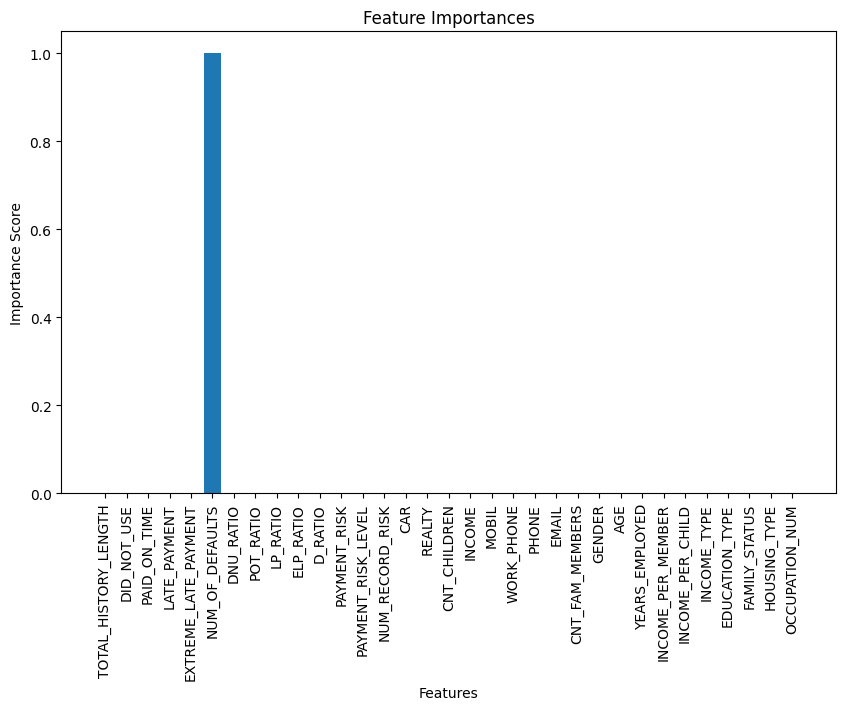

In [4043]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming you have the DataFrame 'df_merged' with the 'DEFAULT' column and other independent variables.

# Step 1: Prepare the Data
X = df_grouped_ID.drop(['DEFAULTED', 'STATUS_NUM', 'DEFAULT_FREQUENCY', 'CUST_STATUS_RISK','CUST_VALUE', 'CUST_SCORE', 'NUM_OF_RECORDS', 
                        'HISTORY_VALUE', 'HISTORY_LENGTH', 'HISTORY_RISK'], axis=1)  # Independent variables (all columns except 'DEFAULT')
y = df_grouped_ID['DEFAULTED']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 4: Get Feature Importances from the Best Model
feature_importances = best_model.feature_importances_

# Step 5: Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


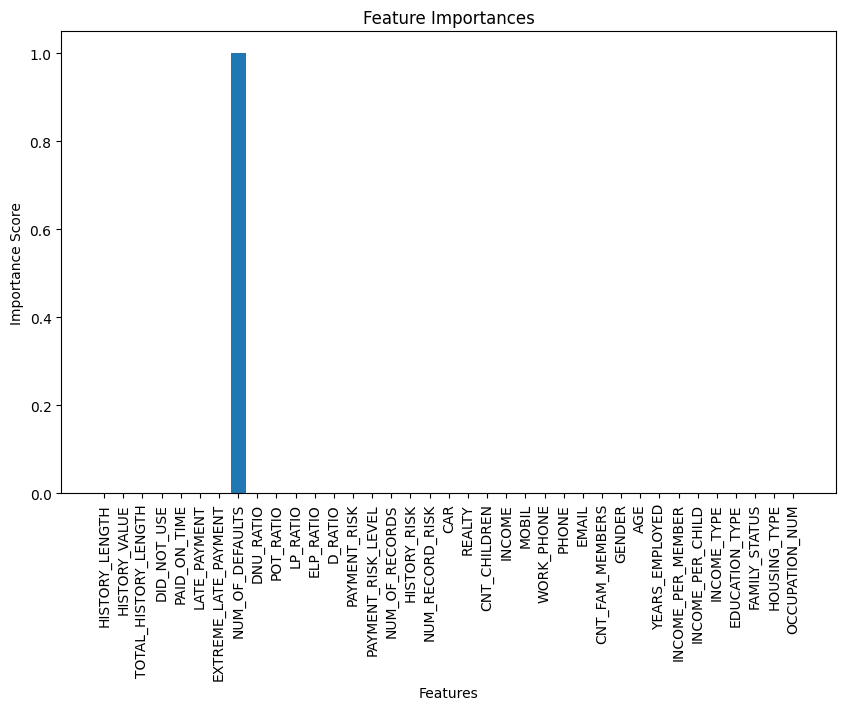

In [4044]:
# Step 1: Prepare the Data
X = df_grouped_ID.drop(['DEFAULTED', 'STATUS_NUM', 'DEFAULT_FREQUENCY', 'CUST_STATUS_RISK', 'CUST_SCORE', 'CUST_VALUE'], axis=1)  # Independent variables (all columns except 'DEFAULT')
y = df_grouped_ID['DEFAULTED']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter Tuning
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 4: Get Feature Importances from the Best Model
feature_importances = best_model.feature_importances_

# Step 5: Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='DEFAULT_FREQUENCY', ylabel='INCOME'>

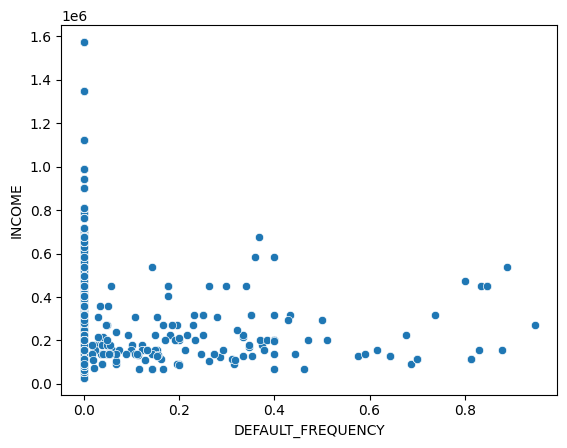

In [4045]:
sns.scatterplot(x='DEFAULT_FREQUENCY', y='INCOME', data=df_grouped_ID)

In [4046]:
correlations = df_grouped_ID.corrwith(df_grouped_ID['DEFAULT_FREQUENCY'])
print(correlations)

HISTORY_LENGTH          0.013208
DEFAULT_FREQUENCY       1.000000
HISTORY_VALUE           0.013079
CUST_STATUS_RISK        0.271185
CUST_VALUE             -0.059556
TOTAL_HISTORY_LENGTH    0.024293
DID_NOT_USE            -0.006752
PAID_ON_TIME           -0.021956
LATE_PAYMENT            0.008714
EXTREME_LATE_PAYMENT    0.426118
NUM_OF_DEFAULTS         0.858727
DNU_RATIO              -0.016726
POT_RATIO              -0.029772
LP_RATIO               -0.011635
ELP_RATIO               0.378015
D_RATIO                 0.948743
PAYMENT_RISK            0.405574
PAYMENT_RISK_LEVEL     -0.027608
NUM_OF_RECORDS          0.032439
HISTORY_RISK           -0.020290
NUM_RECORD_RISK        -0.027608
CUST_SCORE             -0.073156
STATUS_NUM              0.271185
CAR                     0.006133
REALTY                 -0.000719
CNT_CHILDREN           -0.002326
INCOME                  0.018672
MOBIL                        NaN
WORK_PHONE             -0.001829
PHONE                   0.014483
EMAIL     

<Axes: xlabel='DEFAULTED', ylabel='NUM_OF_RECORDS'>

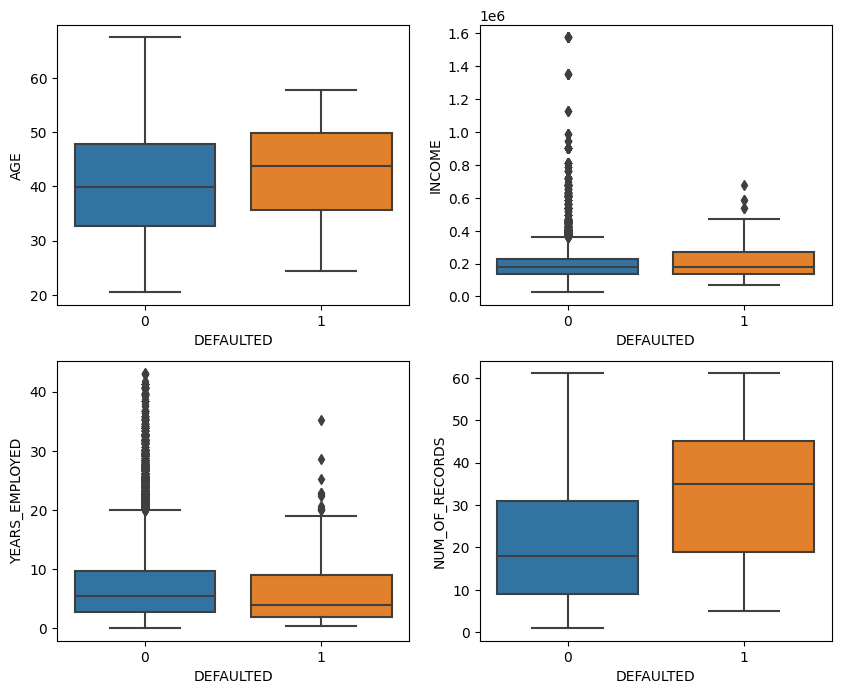

In [4047]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='DEFAULTED',y='AGE', data=df_grouped_ID, ax=ax1)
sns.boxplot(x='DEFAULTED',y='INCOME', data=df_grouped_ID, ax=ax2)
sns.boxplot(x='DEFAULTED',y='YEARS_EMPLOYED', data=df_grouped_ID, ax=ax3)
sns.boxplot(x='DEFAULTED',y='NUM_OF_RECORDS', data=df_grouped_ID, ax=ax4)

In [4048]:
df_merged

,ID,MONTHS_BALANCE,HISTORY_LENGTH,STATUS_VALUE,STATUS_RISK,DEFAULT_FREQUENCY,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,...,GENDER,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM
0,5008804,0,1.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
1,5008804,-1,2.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
2,5008804,-2,3.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
3,5008804,-3,4.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
4,5008804,-4,5.0,2,1,0,1,1.125,2.125,16.0,...,1,32.89,12.44,213750.0,427500.0,4,1,0,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649575,5150487,-25,26.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649576,5150487,-26,27.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649577,5150487,-27,28.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4
649578,5150487,-28,29.0,2,1,0,4,1.000,2.000,30.0,...,1,53.15,5.93,101250.0,202500.0,4,4,1,1,4


<Axes: xlabel='STATUS_NUM', ylabel='NUM_OF_RECORDS'>

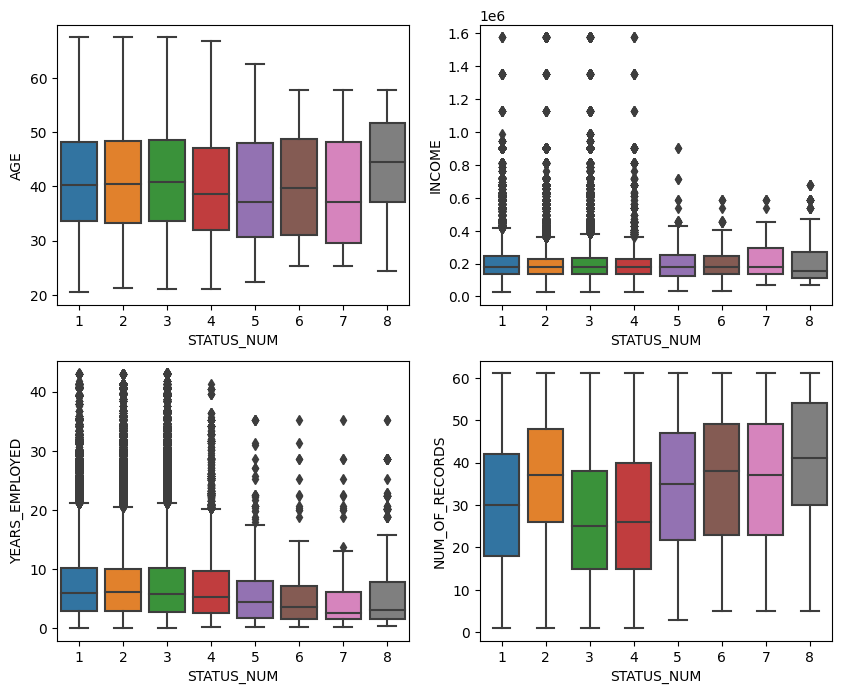

In [4049]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='STATUS_NUM',y='AGE', data=df_merged, ax=ax1)
sns.boxplot(x='STATUS_NUM',y='INCOME', data=df_merged, ax=ax2)
sns.boxplot(x='STATUS_NUM',y='YEARS_EMPLOYED', data=df_merged, ax=ax3)
sns.boxplot(x='STATUS_NUM',y='NUM_OF_RECORDS', data=df_merged, ax=ax4)

In [4050]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649580 entries, 0 to 649579
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    649580 non-null  int64  
 1   MONTHS_BALANCE        649580 non-null  int64  
 2   HISTORY_LENGTH        649580 non-null  float64
 3   STATUS_VALUE          649580 non-null  int64  
 4   STATUS_RISK           649580 non-null  int64  
 5   DEFAULT_FREQUENCY     649580 non-null  int64  
 6   HISTORY_VALUE         649580 non-null  int64  
 7   CUST_STATUS_RISK      649580 non-null  float64
 8   CUST_VALUE            649580 non-null  float64
 9   TOTAL_HISTORY_LENGTH  649580 non-null  float64
 10  DID_NOT_USE           649580 non-null  int64  
 11  PAID_ON_TIME          649580 non-null  int64  
 12  LATE_PAYMENT          649580 non-null  int64  
 13  EXTREME_LATE_PAYMENT  649580 non-null  int64  
 14  NUM_OF_DEFAULTS       649580 non-null  int64  
 15  

<Axes: xlabel='STATUS_NUM', ylabel='HISTORY_LENGTH'>

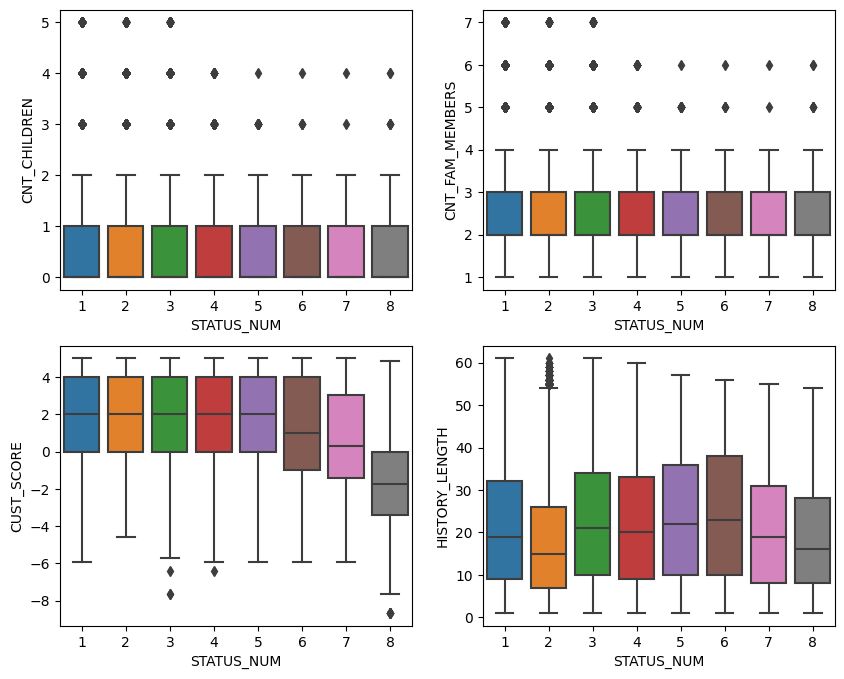

In [4051]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='STATUS_NUM',y='CNT_CHILDREN', data=df_merged, ax=ax1)
sns.boxplot(x='STATUS_NUM',y='CNT_FAM_MEMBERS', data=df_merged, ax=ax2)
sns.boxplot(x='STATUS_NUM',y='CUST_SCORE', data=df_merged, ax=ax3)
sns.boxplot(x='STATUS_NUM',y='HISTORY_LENGTH', data=df_merged, ax=ax4)

In [4052]:
df_grouped_ID.head()

,HISTORY_LENGTH,DEFAULT_FREQUENCY,HISTORY_VALUE,CUST_STATUS_RISK,CUST_VALUE,TOTAL_HISTORY_LENGTH,DID_NOT_USE,PAID_ON_TIME,LATE_PAYMENT,EXTREME_LATE_PAYMENT,...,AGE,YEARS_EMPLOYED,INCOME_PER_MEMBER,INCOME_PER_CHILD,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,OCCUPATION_NUM,DEFAULTED
ID,,,,,,,,,,,,,,,,,,,,,
5008804,8.5,0.0,1.687500,1.125000,2.125000,16.0,1.0,13.0,2.0,0.0,...,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0,0
5008805,8.0,0.0,1.600000,1.133333,2.133333,15.0,1.0,12.0,2.0,0.0,...,32.89,12.44,213750.0,427500.0,4.0,1.0,0.0,4.0,18.0,0
5008806,15.5,0.0,2.566667,0.700000,1.700000,30.0,16.0,7.0,7.0,0.0,...,58.83,3.11,56250.0,112500.0,4.0,4.0,1.0,1.0,16.0,0
5008808,3.0,0.0,1.000000,0.800000,1.800000,5.0,3.0,0.0,2.0,0.0,...,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0,0
5008809,25.0,0.0,4.000000,0.000000,1.000000,27.0,5.0,0.0,0.0,0.0,...,52.36,8.36,270000.0,270000.0,0.0,4.0,3.0,1.0,14.0,0


In [4053]:
df_grouped_ID.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30316 entries, 5008804 to 5150487
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HISTORY_LENGTH        30316 non-null  float64
 1   DEFAULT_FREQUENCY     30316 non-null  float64
 2   HISTORY_VALUE         30316 non-null  float64
 3   CUST_STATUS_RISK      30316 non-null  float64
 4   CUST_VALUE            30316 non-null  float64
 5   TOTAL_HISTORY_LENGTH  30316 non-null  float64
 6   DID_NOT_USE           30316 non-null  float64
 7   PAID_ON_TIME          30316 non-null  float64
 8   LATE_PAYMENT          30316 non-null  float64
 9   EXTREME_LATE_PAYMENT  30316 non-null  float64
 10  NUM_OF_DEFAULTS       30316 non-null  float64
 11  DNU_RATIO             30316 non-null  float64
 12  POT_RATIO             30316 non-null  float64
 13  LP_RATIO              30316 non-null  float64
 14  ELP_RATIO             30316 non-null  float64
 15  D_RATIO         

In [4054]:
X = df_grouped_ID.drop(['DEFAULTED', 'STATUS_NUM', 'DEFAULT_FREQUENCY', 'CUST_STATUS_RISK','CUST_VALUE', 'CUST_SCORE', 'HISTORY_VALUE', 'MOBIL', 'WORK_PHONE', 'PHONE', 'EMAIL', 'NUM_OF_DEFAULTS', 'D_RATIO' ], axis=1) 
#X = df_grouped_ID.drop(['DEFAULTED','MOBIL', 'WORK_PHONE', 'PHONE', 'EMAIL' ], axis=1) 
y = df_grouped_ID['DEFAULTED']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4055]:
print(X)

         HISTORY_LENGTH  TOTAL_HISTORY_LENGTH  DID_NOT_USE  PAID_ON_TIME   
ID                                                                         
5008804             8.5                  16.0          1.0          13.0  \
5008805             8.0                  15.0          1.0          12.0   
5008806            15.5                  30.0         16.0           7.0   
5008808             3.0                   5.0          3.0           0.0   
5008809            25.0                  27.0          5.0           0.0   
...                 ...                   ...          ...           ...   
5150482            20.5                  29.0          0.0           6.0   
5150483             9.5                  18.0         18.0           0.0   
5150484             7.0                  13.0          0.0           1.0   
5150485             1.5                   2.0          0.0           0.0   
5150487            15.5                  30.0          0.0          30.0   

         LA

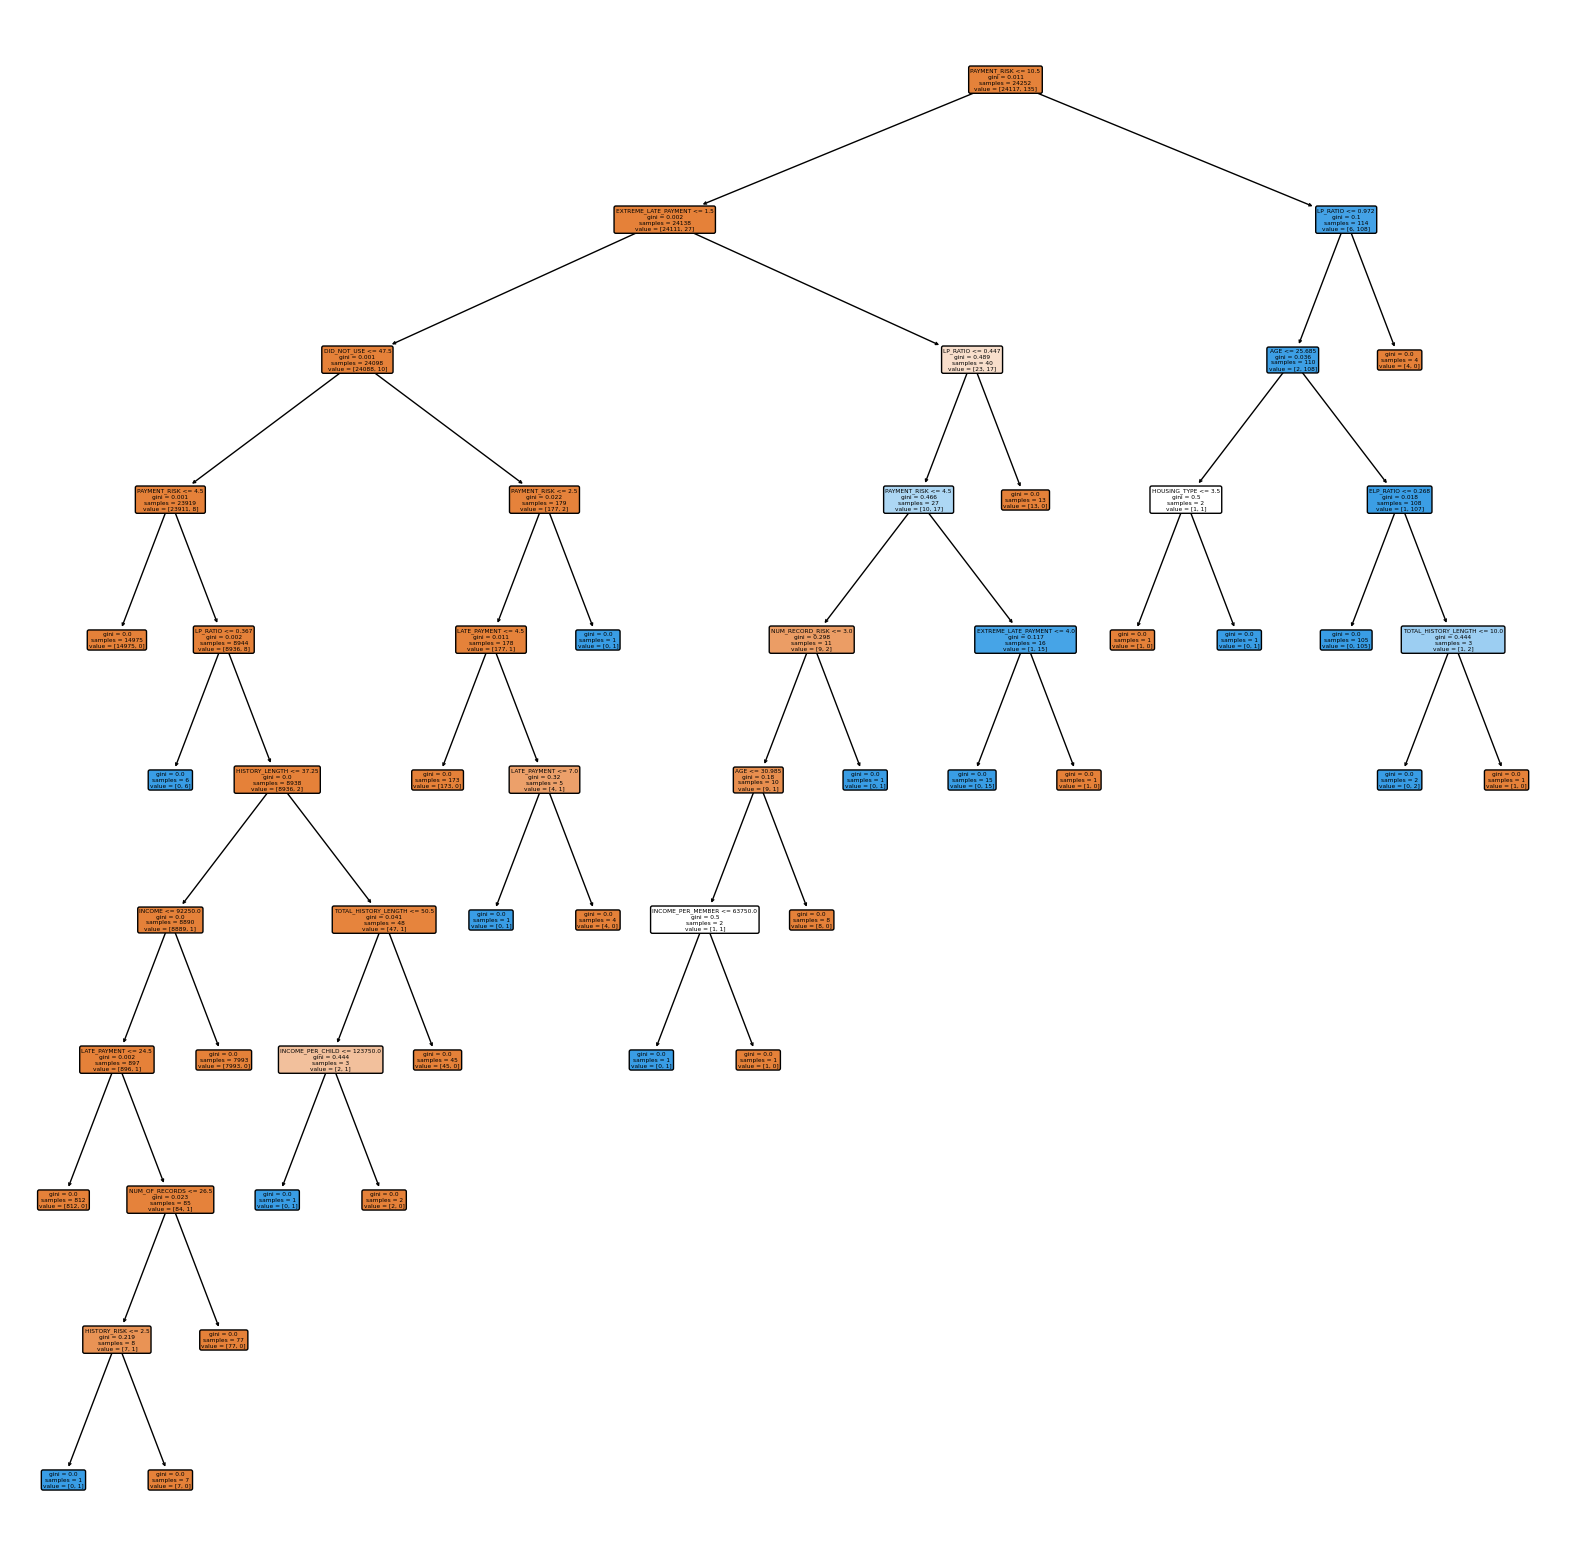

In [4056]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
feature_names = X.columns.tolist()
plot_tree(dt, filled=True, rounded=True, feature_names=feature_names);

In [4057]:
y_pred = dt.predict(X_test)

In [4058]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [4059]:
from sklearn.metrics import confusion_matrix, classification_report

In [4060]:
print('v1_model: ', accuracy_score(predicted, y_test))
cm = confusion_matrix(y_test, y_pred)

# Step 5: Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Step 6: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

v1_model:  0.9937335092348285
Confusion Matrix:
[[6042    8]
 [   3   11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6050
           1       0.58      0.79      0.67        14

    accuracy                           1.00      6064
   macro avg       0.79      0.89      0.83      6064
weighted avg       1.00      1.00      1.00      6064



In [4061]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df_grouped_ID' with the 'DEFAULT_FREQUENCY' column.

# Step 1: Calculate the count of each unique value in 'DEFAULT_FREQUENCY'
default_frequency_counts = df_grouped_ID['DEFAULT_FREQUENCY'].value_counts()
result_table = default_frequency_counts.reset_index()
result_table.columns = ['DEFAULT_FREQUENCY', 'Count']

# Step 3: Display the table
print(result_table)


     DEFAULT_FREQUENCY  Count
0             0.000000  30167
1             0.400000     10
2             0.200000      4
3             0.142857      4
4             0.700000      3
..                 ...    ...
102           0.375000      1
103           0.346154      1
104           0.058824      1
105           0.023810      1
106           0.212121      1

[107 rows x 2 columns]
